In [1]:
import pandas as pd
import numpy as np

In [2]:
stock_name = "FB"
training_data = pd.read_csv(stock_name + "/"+stock_name +"_training_set.csv",low_memory=False)

In [3]:
cols = training_data.columns

In [4]:
print cols

Index([u'Unnamed: 0', u'Date', u'Mod Score', u'Average Score', u'Stock Price',
       u'Change'],
      dtype='object')


In [5]:
x = training_data[cols[2:4]] #taking Date and Averagee sentiment
print x

    Mod Score  Average Score
0         1.0            1.0
1         1.0            2.0
2         1.0            1.0
3         1.0            1.0
4         1.0            1.0
5         1.0            2.0
6         1.0            1.0
7         1.0            2.0
8         1.0            2.0
9         1.0            1.0
10        1.0            3.0
11        1.0            2.0
12        2.0            3.0
13        1.0            3.0
14        1.0            1.0
15        1.0            1.0
16        1.0            2.0
17        2.0            3.0
18        1.0            2.0
19        2.0            3.0
20        1.0            1.0
21       -1.0            1.0
22        1.0            1.0
23        1.0            2.0
24        1.0            1.0
25        1.0            2.0
26        1.0            1.0
27        1.0            2.0
28        1.0           -2.0
29        1.0            2.0
30        1.0           -2.0


In [6]:
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
X = []
temp = training_data['Average Score']
for entry in training_data['Average Score']:
    X.append([entry])
X = np.array(X)
y = np.array(training_data['Change'])

In [7]:
logreg = LogisticRegression()
logreg.fit(X,y)
log_predict = logreg.predict(X)

In [8]:
print metrics.accuracy_score(y,log_predict)

0.516129032258


In [9]:
y = np.asarray(training_data[cols[len(cols)-1]].dropna(),dtype="|S6")#output
print y

['0.0' '1.0' '1.0' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 '0.0' '0.0' '1.0' '1.0' '1.0' '1.0' '0.0' '1.0' '0.0' '1.0' '1.0' '1.0'
 '0.0' '0.0' '1.0' '1.0' '0.0' '1.0' '1.0']


In [10]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100)

In [11]:
#values,target = x[:-10],y[:-10]

In [12]:
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
#model = X.ix[len(X)-1]
#print model
svm_predict = clf.predict(X)
print metrics.accuracy_score(y,svm_predict)

0.516129032258


/home/shachi/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


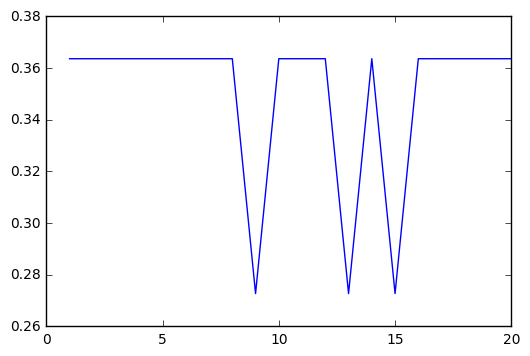

In [14]:
#using the train/test/split method to get accuracy values for k values 1 through 20
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)
vals = []
ks = []
for i in xrange(1,21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_predict = knn.predict(X_test)
    vals.append(metrics.accuracy_score(y_test,knn_predict))
    ks.append(i)
plt.plot(ks,vals)
plt.show()

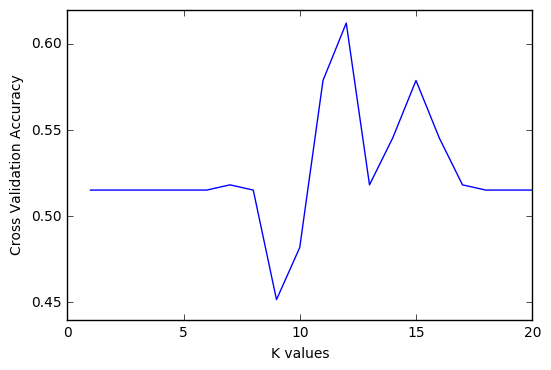

0.525


In [35]:
#Using cross validation and k fold to get accuracy values from k values 1 through 20
cross_val_accuracy = []
for i in xrange(1,21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, y, cv=3, scoring = 'accuracy')
    cross_val_accuracy.append(scores.mean())
plt.plot(ks, cross_val_accuracy)
plt.xlabel("K values")
plt.ylabel("Cross Validation Accuracy")
plt.show()
print np.array(cross_val_accuracy).mean()

In [58]:
#Ensemble learning using k folds. In our case, we have 5 folds so 5 training sets that are fit to the model.
#We append each prediction to the prediction array and come to a conclusion based on the most common prediction
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
test_sentiment = 2
predictions = []
for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    y_train = y[train_index]
    knn = neighbors.KNeighborsClassifier(n_neighbors=15)
    knn.fit(X_train,y_train)
    predictions.append(np.array(knn.predict(test_sentiment))[0])
ones = 0
zeros = 0
for i in xrange(0,len(predictions)):
    if predictions[i] == '0.0':
        zeros+=1
    if predictions[i] == '1.0':
        ones+=1
print predictions
if ones>zeros:
    print "Prediction: Decrease in stock value"
else:
    print "Prediction: Increase in stock value"

['0.0', '1.0', '0.0', '0.0', '0.0']
Prediction: Increase in stock value
